In [1]:
import pandas as pd
import numpy as np



file = "aes_data.xlsx"

data = pd.read_excel(file)




# data = data.drop([0,1,2], axis=0)

df = data.drop([0,1,2], axis=0)
cols_fillna = df.columns.values
for col in cols_fillna:
    df[col].fillna(0,inplace=True)
    df[col].fillna(0,inplace=True)



data.head()


,Время,10LAB11CP002_XQ01,10LAB12CP002_XQ01,10LAB13CP002_XQ01,10LAB14CP002_XQ01,10LAB15CP002_XQ01,10LAB11CP003_XQ01,10LAB12CP003_XQ01,10LAB13CP003_XQ01,10LAB14CP003_XQ01,...,10LAC12CS001A_XQ01,10LAC13CS001A_XQ01,10LAC14CS001A_XQ01,10LAC15CS001A_XQ01,10BBA00CE010_XQ01,10BBB00CE010_XQ01,10BBC00CE010_XQ01,10BBD00CE010_XQ01,10MKA10CE912_XQ01,10JKS00FU901_XQ01
0,NaN,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,...,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание,Дост--Описание
1,NaN,дост Р ПИТВ ВСАС ПИТ НАС 0-1.6 МПА,дост Р ПИТВ ВСАС ПИТ НАС 0-1.6 МПА,дост Р ПИТВ ВСАС ПИТ НАС 0-1.6 МПА,дост Р ПИТВ ВСАС ПИТ НАС 0-1.6 МПА,дост Р ПИТВ ВСАС ПИТ НАС 0-1.6 МПА,дост Р ПИТВ НАП ПИТ НАС 0-16 МПА,дост Р ПИТВ НАП ПИТ НАС 0-16 МПА,дост Р ПИТВ НАП ПИТ НАС 0-16 МПА,дост Р ПИТВ НАП ПИТ НАС 0-16 МПА,...,дост Частота вращения ротора электродвигателя,дост Частота вращения ротора электродвигателя,дост Частота вращения ротора электродвигателя,дост Частота вращения ротора электродвигателя,дост U НА СЕКЦ BBA 0-13 КВ,дост U НА СЕКЦ BBB 0-13 КВ,дост U НА СЕКЦ BBC 0-13 КВ,дост U НА СЕКЦ BBD 0-13 КВ,дост -100-1500 MBT,дост Среднее значение мощности реактора
2,NaN,МПа,МПа,МПа,МПа,МПа,МПа,МПа,МПа,МПа,...,об/мин,об/мин,об/мин,об/мин,кВ,кВ,кВ,кВ,МВт,МВт
3,01.01.19 00:00:00,0.80,0.76,0.75,0.80,0.77,0.7,9.4,9.5,0.8,...,2995,2994,0,2995,10.5,10.2,10.5,10.4,576,1803
4,01.01.19 01:00:00,0.80,0.76,0.75,0.80,0.77,0.7,9.4,9.5,0.8,...,2995,2996,0,2995,10.5,10.2,10.5,10.4,575,1795


In [2]:
df.head()

,Время,10LAB11CP002_XQ01,10LAB12CP002_XQ01,10LAB13CP002_XQ01,10LAB14CP002_XQ01,10LAB15CP002_XQ01,10LAB11CP003_XQ01,10LAB12CP003_XQ01,10LAB13CP003_XQ01,10LAB14CP003_XQ01,...,10LAC12CS001A_XQ01,10LAC13CS001A_XQ01,10LAC14CS001A_XQ01,10LAC15CS001A_XQ01,10BBA00CE010_XQ01,10BBB00CE010_XQ01,10BBC00CE010_XQ01,10BBD00CE010_XQ01,10MKA10CE912_XQ01,10JKS00FU901_XQ01
3,01.01.19 00:00:00,0.80,0.76,0.75,0.80,0.77,0.7,9.4,9.5,0.8,...,2995,2994,0,2995,10.5,10.2,10.5,10.4,576,1803
4,01.01.19 01:00:00,0.80,0.76,0.75,0.80,0.77,0.7,9.4,9.5,0.8,...,2995,2996,0,2995,10.5,10.2,10.5,10.4,575,1795
5,01.01.19 02:00:00,0.80,0.76,0.76,0.80,0.77,0.7,9.4,9.5,0.8,...,2995,2996,0,2995,10.5,10.2,10.5,10.4,575,1781
6,01.01.19 03:00:00,0.80,0.76,0.76,0.80,0.78,0.7,9.8,9.8,0.8,...,2995,2996,0,2993,10.5,10.2,10.5,10.4,386,1316
7,01.01.19 04:00:00,0.80,0.77,0.75,0.80,0.77,0.7,0.9,9.4,0.8,...,0,2994,0,2993,10.6,10.4,10.5,10.4,379,1301


In [19]:
print(df.isnull().values.any())
df.fillna(0)
print(df.isnull().values.any())


False
False


In [3]:
df[df.isnull()]


,Время,10LAB11CP002_XQ01,10LAB12CP002_XQ01,10LAB13CP002_XQ01,10LAB14CP002_XQ01,10LAB15CP002_XQ01,10LAB11CP003_XQ01,10LAB12CP003_XQ01,10LAB13CP003_XQ01,10LAB14CP003_XQ01,...,10LAC12CS001A_XQ01,10LAC13CS001A_XQ01,10LAC14CS001A_XQ01,10LAC15CS001A_XQ01,10BBA00CE010_XQ01,10BBB00CE010_XQ01,10BBC00CE010_XQ01,10BBD00CE010_XQ01,10MKA10CE912_XQ01,10JKS00FU901_XQ01
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
import matplotlib.pyplot as plt
import pandas as pd



# a scatter plot comparing num_children and num_pets
# data.iloc[:5,:].reset_index().plot(kind='line',x='index',y='10LAB11CP002_XQ01',color='red', ax=ax)


x, y = df['10LAB11CP002_XQ01'].min(), df['10LAB11CP002_XQ01'].max()
# df['SIZE'] = (df.TOTAL - x) / (y - x) * (b - a) + a


plot_df = pd.to_numeric(df['10LAB11CP002_XQ01'], errors='coerce')

df1 = (plot_df - plot_df.mean())/plot_df.std()

df1.head()




3   -0.032955
4   -0.032955
5   -0.032955
6   -0.032955
7   -0.032955
Name: 10LAB11CP002_XQ01, dtype: float64

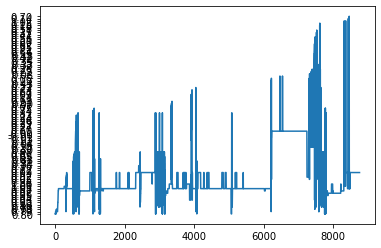

In [5]:
ax = plt.gca()

plt.plot(df.reset_index()['index'], df['10LAB11CP002_XQ01'])


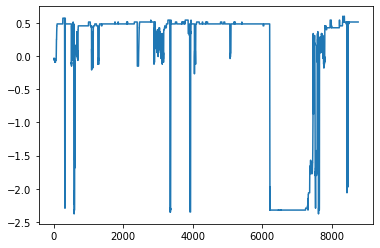

In [6]:
df1.head()

plt.plot(df.reset_index()['index'], df1)


In [7]:
plot_df2 = pd.to_numeric(df['10JKS00FU901_XQ01'], errors='coerce')

df2 = (plot_df2-plot_df2.mean())/plot_df2.std()
df2.head()

3   -0.477276
4   -0.483238
5   -0.493670
6   -0.840193
7   -0.851371
Name: 10JKS00FU901_XQ01, dtype: float64

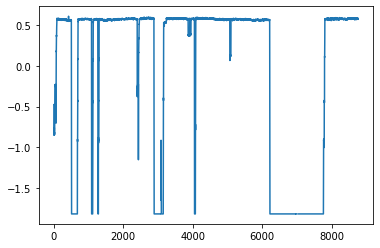

In [8]:
plt.plot(df.reset_index()['index'], df2)

In [9]:
# v1 = pd.to_numeric(df['10JKS00FU901_XQ01'], errors='coerce')[:3000]
# v2 = pd.to_numeric(df['10LAB11CP002_XQ01'], errors='coerce')[:3000]



# np.cov(v1.to_numpy().T,v2.to_numpy().T, rowvar=0)

np.cov(df1.to_numpy()[:6000].T,df2.to_numpy()[:6000].T, rowvar=0)




array([[0.12801798,        nan],
       [       nan,        nan]])

In [10]:
np.corrcoef(df1.to_numpy()[:3000], df2.to_numpy()[:3000])

array([[1.        , 0.48668013],
       [0.48668013, 1.        ]])

In [11]:
np.correlate(df1,df2)

array([nan])

In [12]:
filtered_df = df1[df1.isnull()]

In [13]:
print(filtered_df)

6471   NaN
6544   NaN
Name: 10LAB11CP002_XQ01, dtype: float64


In [14]:
filtered_df = df2[df2.isnull()]
print(filtered_df)

3067   NaN
3068   NaN
3069   NaN
3070   NaN
3071   NaN
        ..
7047   NaN
7048   NaN
7049   NaN
7050   NaN
7051   NaN
Name: 10JKS00FU901_XQ01, Length: 91, dtype: float64


In [15]:
df2[3060:3100]

3063   -1.820890
3064   -1.820890
3065   -1.820890
3066   -1.820890
3067         NaN
3068         NaN
3069         NaN
3070         NaN
3071         NaN
3072         NaN
3073         NaN
3074         NaN
3075         NaN
3076         NaN
3077         NaN
3078         NaN
3079         NaN
3080         NaN
3081         NaN
3082         NaN
3083         NaN
3084         NaN
3085         NaN
3086   -1.652473
3087   -0.930364
3088   -0.933345
3089   -0.915460
3090   -0.925147
3091   -1.110705
3092   -1.820890
3093   -1.820890
3094   -1.820890
3095   -1.820890
3096   -1.820890
3097   -1.820890
3098   -1.820890
3099   -1.820890
3100   -1.820890
3101   -1.820890
3102   -1.820890
Name: 10JKS00FU901_XQ01, dtype: float64

In [16]:
df.isnull().values.any()

False